### The data for this exercise was obtained from Kaggle. We have feature information like age, zip code , family members, mortgage, etc. and we also have credit card information which is our target variable. Our goal in this exercise is to build a machine Learning model using binary tree to segregate our population into "issue credit card" vs "non-issue of credit card". 

In [1]:
#Step 1: Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Step 2: import our datafile which is in the from of a csv file format.
df=pd.read_csv('UniversalBank.csv')

In [4]:
#Step 3: understand our data first, before we can start to clean it.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Our dataframe has 14 variables. CreditCard is our target class while others are features.

In [11]:
#### Let us clean our data by removing Zip code and ID.

df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


### Although the zip code is numeric, we don't acheive any value unless we have other data that correlates to Zip code. 

#### Let us also check for NA before we beging with our analysis

In [14]:
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Before we begin our analysis, let's standardize the dataset using StandardScaler library

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [24]:
df_scaled.shape

(5000, 12)

In [30]:
X=pd.DataFrame(data=df_scaled[:,:-1])

In [34]:
y=df['CreditCard']

(5000, 11)

### let us now divide our dataset into training vs testing dataset. 

In [41]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.5, random_state=11)

### We now build a Decision Tree model for classification

In [44]:
#building decision tree model to classify the data

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

### Let us now check the accuracy of our model

In [46]:
y_predicted = dtc.predict(X_test)
from sklearn.metrics import  classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84      1784
           1       0.72      0.14      0.23       716

    accuracy                           0.74      2500
   macro avg       0.73      0.56      0.54      2500
weighted avg       0.73      0.74      0.67      2500



### Let us visualize how many we got right vs wrong with the decision tree we implemented.

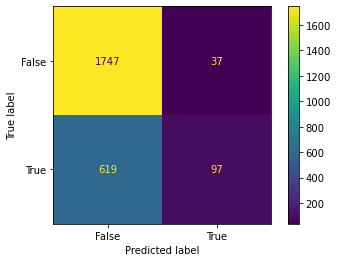

In [47]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### It looks like we predicted 619 data points as False while the true label was true. 
### Our model is good at predicting False labels as compared to True labels.

## Improvement to our model

### One of the thing we can do is increase our levels (max_depth). Originally it was 5, it's try 50 this time.

In [54]:
dtc_new = DecisionTreeClassifier(criterion='gini', max_depth=20)
dtc_new.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [55]:
y_predicted_new = dtc_new.predict(X_test)
from sklearn.metrics import  classification_report
print(classification_report(y_test,y_predicted_new))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1784
           1       0.35      0.36      0.36       716

    accuracy                           0.63      2500
   macro avg       0.55      0.55      0.55      2500
weighted avg       0.63      0.63      0.63      2500



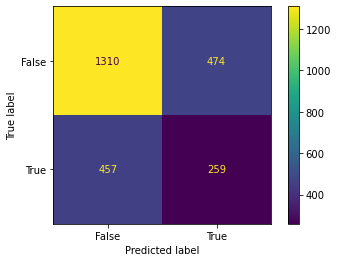

In [56]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted_new)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### We increased our depth from 5 to 20 yet saw in decline in accuracy from 74% to 63%. 

### A deeper tree can fit more complicated functions. Therefore, increasing tree depth should increase performance on the training set. But, increased flexibility also gives greater ability to overfit the data, and generalization performance may suffer if depth is increased too far (i.e. test set performance may decrease). 

## Let us try fine tuning the hyperparameter for the decision tree i've implemented

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1784
           1       0.48      0.22      0.30       716

    accuracy                           0.71      2500
   macro avg       0.61      0.56      0.56      2500
weighted avg       0.67      0.71      0.67      2500



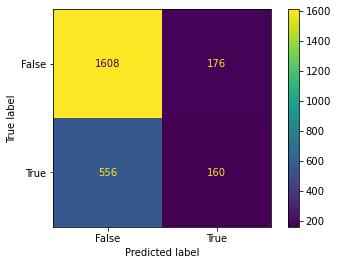

In [60]:
dtc_new_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=12)
dtc_new_entropy.fit(X_train,y_train)

y_predicted_new_entropy = dtc_new_entropy.predict(X_test)
from sklearn.metrics import  classification_report
print(classification_report(y_test,y_predicted_new_entropy))

confusion_matrix = metrics.confusion_matrix(y_test, y_predicted_new_entropy)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Increasing our entropy did not results in much improvement. Our next step is to try Support Vector Classification to try and get an improvement. 

#building linear SVM to classify the data

from sklearn.svm import SVC #"Support vector classifier"
model = SVC(kernel='linear')
model.fit(X_train,y_train)


y_pred_svc = model.predict(X_test)

print(classification_report(y_test,y_pred_svc))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Let us tune the hyperparameter by changing it from 'Linear' to 'Poly'. 

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1784
           1       0.88      0.14      0.24       716

    accuracy                           0.75      2500
   macro avg       0.81      0.57      0.55      2500
weighted avg       0.78      0.75      0.68      2500



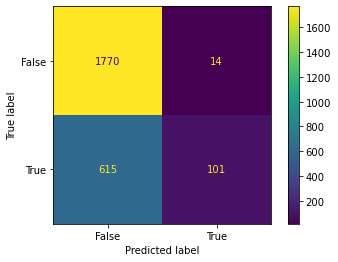

In [67]:
#building linear SVM to classify the data

from sklearn.svm import SVC #"Support vector classifier"
model = SVC(kernel='poly')
model.fit(X_train,y_train)


y_pred_svc = model.predict(X_test)

print(classification_report(y_test,y_pred_svc))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## In this notebook, we have successfully demonstrated the implementation of 2 supervised ML algorithms, Support Vector Classification (SVC) and Decision Tree (DT) to build a model to predict if a person qualifies for credit card or not. 